# Lets build PCA

In [1]:
import numpy as np
np.random.seed(1) #this is used for debugging purpose

**creating data**

In [57]:
mu_vec1 = np.array([0,0,0]) #sample mean
cov_mat1 = np.array(([1,0,0],[0,1,0],(0,0,1)))
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 200).T
print(class1_sample)

[[ 1.00819561e+00  2.00514053e+00  1.16533544e+00 -2.09846949e-01
   1.30122484e+00  1.86291309e+00 -3.63053451e-01  1.16892637e+00
   1.88553315e-01  1.31782301e-01 -1.80394363e+00 -7.96065249e-01
   2.93572087e-01  1.05420704e+00  1.18901076e+00 -1.81472709e+00
   4.96505038e-01  1.57578345e+00  3.63577886e-01 -1.02336220e+00
   7.86920498e-02 -7.62084805e-01 -3.19280859e-01  1.09684815e+00
  -2.48305833e-01 -4.21096885e-01 -1.43403073e+00 -1.85664142e+00
   6.83356255e-01 -3.47009949e-01  8.52829822e-02 -2.45389193e+00
  -6.21207339e-01 -7.63142601e-01 -1.57407343e+00  9.52547818e-01
  -1.13730441e+00 -1.82575352e-02 -6.97809900e-01  7.84904647e-01
  -6.23279994e-01  7.31145370e-01 -1.16896134e+00 -8.89961510e-01
  -2.23574887e-01 -1.06770234e+00 -1.36372510e-01 -9.98566415e-01
   8.10832058e-02 -5.86680440e-01 -4.06070901e-01  1.07737657e+00
   1.82990624e+00  4.39127373e-01 -1.10321635e+00  8.34283205e-01
  -8.10140031e-01 -8.60135131e-02  1.25673747e+00 -1.74437237e+00
   1.64859

In [58]:
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array(([1,0,0],[0,1,0],[0,0,1]))
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 200).T
print(class2_sample) #matrix with 3 columns and 20 rows 

[[ 8.63361900e-01  1.25948771e+00  6.50218338e-01  3.11262212e+00
   1.48259795e+00  2.61679423e+00  1.76711310e+00 -4.49981891e-02
   7.67397116e-01  1.56975129e+00 -1.01549801e+00  4.09673830e-02
   1.57841054e+00  1.27524887e+00  3.42158930e+00  6.90320520e-01
   3.20866163e+00  1.60736615e+00  1.57908722e+00  3.66625332e-01
   1.95587665e+00 -2.17973380e-01  2.91916876e+00 -5.20746217e-01
   7.77780524e-01  1.69530600e+00  2.25913353e+00 -2.92737403e-01
   1.68140191e+00  1.62521819e+00  2.46114546e-02  1.08090345e-01
   6.26523545e-01  2.59368556e+00  2.48969053e-01  2.47681361e+00
   1.27497560e-01  1.48737801e-01  2.17244919e+00  2.43162759e-01
   1.77720880e+00  1.94251314e+00  1.18116909e+00  1.14088730e+00
  -7.50757585e-01  2.39395243e-01  1.22782691e+00  1.47874513e+00
   8.39564792e-01  3.42497747e+00 -4.36101926e-02  8.76604490e-01
   2.23396389e-01  1.06465569e+00  2.30120189e+00  2.70666184e+00
  -7.23321102e-02  2.13548397e+00  2.50356122e+00  1.48517755e+00
  -2.06414

**visualizing the data**

<IPython.core.display.Javascript object>


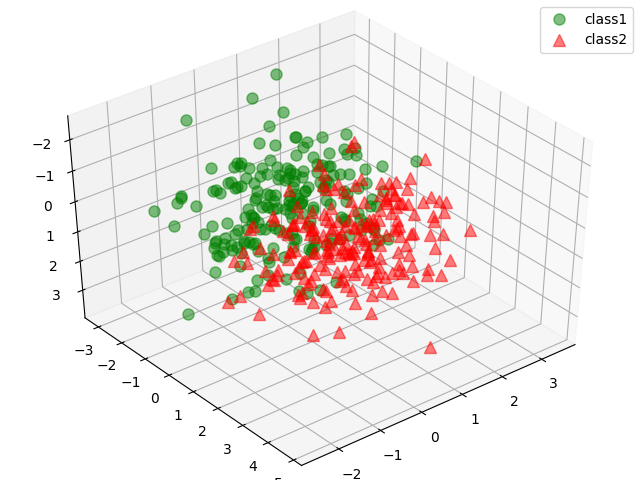

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
fig = plt.figure()

ax = Axes3D(fig)
plt.rcParams['legend.fontsize']=10
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
       'o', markersize=8, alpha=0.5, color='green', label = 'class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:],
        '^', markersize=8, alpha=0.5, color='red', label='class2')
ax.legend(loc='upper right')
plt.show()
                                          

**merging the data**

In [60]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
all_samples

array([[ 1.00819561,  2.00514053,  1.16533544, ...,  0.84635268,
         0.43717096, -0.89627793],
       [-3.01603199, -0.18762635,  0.19664529, ...,  0.16154971,
        -0.2514994 ,  0.04178718],
       [-1.61964569, -0.14894123, -0.63259014, ..., -0.30583295,
         2.29857162,  0.11697827]])

In [61]:
all_samples.T

array([[ 1.00819561, -3.01603199, -1.61964569],
       [ 2.00514053, -0.18762635, -0.14894123],
       [ 1.16533544,  0.19664529, -0.63259014],
       ...,
       [ 0.84635268,  0.16154971, -0.30583295],
       [ 0.43717096, -0.2514994 ,  2.29857162],
       [-0.89627793,  0.04178718,  0.11697827]])

**Finding mean of all three dimentions and save it as mean_vector**

In [62]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])
mean_vector = np.array([[mean_x], [mean_y],[mean_z]])
mean_vector

array([[0.48685874],
       [0.42613768],
       [0.53493403]])

**Finding covariance matrix of the data**

In [63]:
cov_mat = np.cov([all_samples[0,:], all_samples[1,:], all_samples[2,:]])
cov_mat

array([[1.25609648, 0.20175815, 0.21409828],
       [0.20175815, 1.35891051, 0.2907033 ],
       [0.21409828, 0.2907033 , 1.27187179]])

**finding eigen values and eigen vectors of the covariance matrix**
An eigenvalue is a number, telling you how much variance there is in the data in that direction, means eigenvalue is a number telling us how spread out the data is on the line. The eigenvector with the highest eigenvalue is therefore the principal component.

In [64]:
eig_val, eig_vec = np.linalg.eig(cov_mat)
print('eigen values')
print(eig_val)
print('eigen vectors')
print(eig_vec)

eigen values
[1.77478422 1.09991586 1.01217869]
eigen vectors
[[ 0.49211727  0.82163822 -0.28763037]
 [ 0.64636276 -0.56619806 -0.51150263]
 [ 0.58312587 -0.06580572  0.80971219]]


**finding eigen vectors which can be used for making a matrix whose transpose can be used to mutiply with all samples **

In [75]:
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

eig_pairs.sort()
eig_pairs.reverse()

eig_pairs
# for i in eig_pairs:
#     print(i[0])

[(1.7747842249358596, array([0.49211727, 0.64636276, 0.58312587])),
 (1.0999158639411852, array([ 0.82163822, -0.56619806, -0.06580572])),
 (1.0121786891755569, array([-0.28763037, -0.51150263,  0.80971219]))]

In [78]:
eig_pairs[0][1]

array([0.49211727, 0.64636276, 0.58312587])

In [79]:
eig_pairs[0][1].reshape(3,1)

array([[0.49211727],
       [0.64636276],
       [0.58312587]])

In [80]:
eig_pairs[1][1]

array([ 0.82163822, -0.56619806, -0.06580572])

In [81]:
eig_pairs[1][1].reshape(3,1)

array([[ 0.82163822],
       [-0.56619806],
       [-0.06580572]])

In [85]:
eig_pairs[2][1].reshape(3,1)

array([[-0.28763037],
       [-0.51150263],
       [ 0.80971219]])

**stacking the first two vectors to make a dimentinally correct matrix**

In [88]:
matrix_w_good = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W with top two principal componets: \n', matrix_w)

Matrix W with top two principal componets: 
 [[ 0.82163822 -0.28763037]
 [-0.56619806 -0.51150263]
 [-0.06580572  0.80971219]]


In [89]:
matrix_w_bad = np.hstack((eig_pairs[1][1].reshape(3,1), eig_pairs[2][1].reshape(3,1)))
print('Matrix W with worst two principal components: \n', matrix_w)

Matrix W with worst two principal components: 
 [[ 0.82163822 -0.28763037]
 [-0.56619806 -0.51150263]
 [-0.06580572  0.80971219]]


**Making the matrix of all data but in reduced number of dimentions. in this case 2. Transpose is a matrix of all those data**

In [94]:
transformed_good = matrix_w_good.T.dot(all_samples)
print(transformed_good)

[[-2.39775757e+00  7.78638121e-01  3.31706221e-01  3.17459791e-01
   2.80276111e-01  9.88186294e-01 -1.20111015e+00  7.75477159e-01
  -1.20393390e-01 -1.51056222e+00 -5.06616825e-01  3.56996968e-01
   1.86571729e-01 -3.84415502e-01 -2.43962264e+00 -6.86734572e-01
   1.18993353e+00  8.50634531e-01 -6.72935360e-01 -1.79397276e-01
  -1.62249395e+00 -4.20341599e-01 -3.70583418e-01  1.84633068e+00
   1.03987906e+00  5.66809301e-01 -1.25666574e-01 -2.22455886e+00
  -6.39676133e-02 -6.35447529e-01  7.18523323e-01  6.29308545e-02
   4.61853598e-02  6.87455760e-01 -1.56037900e+00 -1.67404060e+00
  -3.11987423e-01  8.05911497e-01 -1.21138401e+00  1.59283349e+00
  -1.29168807e+00 -4.75711426e-01 -3.28412197e+00 -4.82334090e-01
  -1.34581273e+00  8.05139306e-01 -2.10063543e-01 -3.89167266e-01
   1.82274634e+00 -5.89750835e-02 -3.00463255e-01 -7.47879602e-01
   3.96490033e-01 -5.39359135e-02 -2.05743976e+00  7.52962872e-01
   8.19308622e-01 -9.69541453e-01  8.71105306e-01  5.55084174e-01
   9.79647

In [95]:
transformed_bad = matrix_w_bad.T.dot(all_samples)
print(transformed_bad)

[[ 2.64262547e+00  1.76353495e+00  8.87771998e-01 -1.15568354e+00
   1.26386027e+00  1.83968276e+00  5.23460045e-01  1.02953127e+00
   1.55880530e-01  1.28879984e+00 -1.65823068e+00 -1.13382436e+00
   4.14723729e-01  1.29387148e+00  2.46185905e+00 -1.60397764e+00
   2.63760935e-01  7.14552589e-01  8.22121373e-01 -8.82705327e-01
   8.40761282e-01 -2.37470328e-01 -1.45183614e-01 -5.32557534e-02
  -1.02695000e+00 -9.31811089e-01 -1.55293780e+00 -3.16540462e-01
   3.06455022e-01 -5.61477278e-01 -1.11503289e-01 -2.23110689e+00
  -3.94131740e-01 -1.31766292e+00 -1.25426532e+00  1.85346808e+00
  -5.66285204e-01 -2.50501849e-01 -1.90133156e-01 -2.96876910e-01
  -1.44286614e-01  1.21932150e+00  2.82152609e-01 -8.33787929e-01
   4.84225518e-01 -1.13161254e+00  5.79489155e-01 -1.10700497e+00
  -1.82775483e+00 -6.93052434e-01  1.72737733e-02  1.49906572e+00
   2.26336853e+00  9.35324033e-01 -1.98102635e-01  8.68481970e-01
  -1.10627844e+00  5.89100304e-01  6.39510259e-01 -1.94570151e+00
   1.12207

In [100]:
transformed = matrix_w_good.T.dot(all_samples - mean_vector) #by doing this, centre of the data comes at origin of the new axes
print(transformed)

[[-3.22472256e+00 -4.83268706e-02 -4.95258771e-01 -5.09505200e-01
  -5.46688880e-01  1.61221302e-01 -2.02807514e+00 -5.14878331e-02
  -9.47358382e-01 -2.33752722e+00 -1.33358182e+00 -4.69968024e-01
  -6.40393263e-01 -1.21138049e+00 -3.26658763e+00 -1.51369956e+00
   3.62968537e-01  2.36695390e-02 -1.49990035e+00 -1.00636227e+00
  -2.44945894e+00 -1.24730659e+00 -1.19754841e+00  1.01936569e+00
   2.12914063e-01 -2.60155691e-01 -9.52631566e-01 -3.05152385e+00
  -8.90932605e-01 -1.46241252e+00 -1.08441669e-01 -7.64034137e-01
  -7.80779632e-01 -1.39509232e-01 -2.38734399e+00 -2.50100560e+00
  -1.13895242e+00 -2.10534953e-02 -2.03834900e+00  7.65868498e-01
  -2.11865306e+00 -1.30267642e+00 -4.11108696e+00 -1.30929908e+00
  -2.17277773e+00 -2.18256862e-02 -1.03702854e+00 -1.21613226e+00
   9.95781351e-01 -8.85940075e-01 -1.12742825e+00 -1.57484459e+00
  -4.30474958e-01 -8.80900905e-01 -2.88440475e+00 -7.40021202e-02
  -7.65636953e-03 -1.79650644e+00  4.41403143e-02 -2.71880818e-01
   1.52682

<IPython.core.display.Javascript object>


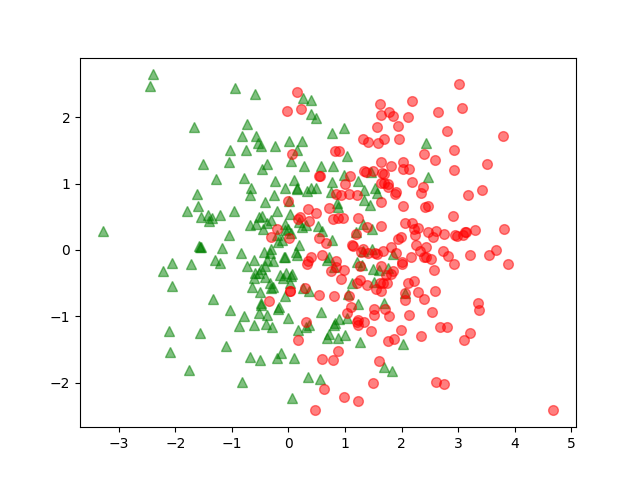

In [96]:
plt.figure()
plt.plot(transformed_good[0,0:200], transformed_good[1,0:200], '^', markersize=7, color='green', alpha = 0.5, label = 'class1')
plt.plot(transformed_good[0,200:400], transformed_good[1,200:400], 'o', markersize=7, color='red', alpha = 0.5, label = 'class2')
plt.show()

<IPython.core.display.Javascript object>


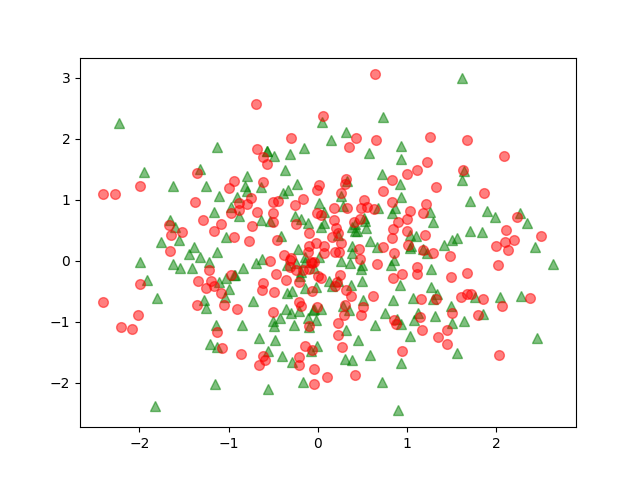

In [97]:
plt.figure()
plt.plot(transformed_bad[0,0:200], transformed_bad[1,0:200], '^', markersize=7, color='green', alpha = 0.5, label = 'class1')
plt.plot(transformed_bad[0,200:400], transformed_bad[1,200:400], 'o', markersize=7, color='red', alpha = 0.5, label = 'class2')
plt.show()

<IPython.core.display.Javascript object>


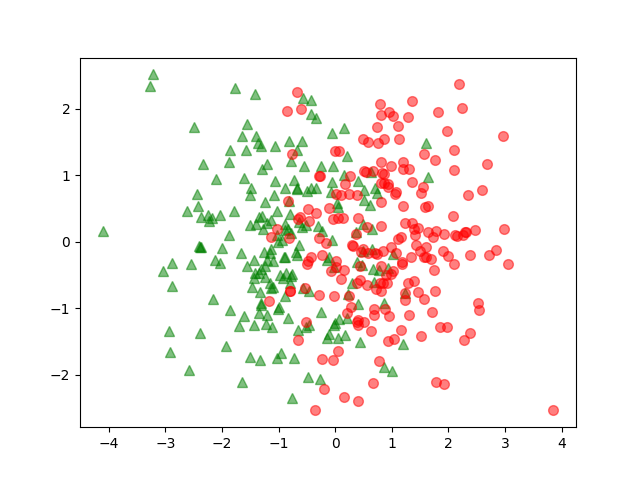

In [99]:
plt.figure()
plt.plot(transformed[0,0:200], transformed[1,0:200], '^', markersize=7, color='green', alpha = 0.5, label = 'class1')
plt.plot(transformed[0,200:400], transformed[1,200:400], 'o', markersize=7, color='red', alpha = 0.5, label = 'class2')
plt.show()

# using sklearn to do PCA
**Results are almost similar to step by step PCA**

In [102]:
all_samples.T

array([[ 1.00819561, -3.01603199, -1.61964569],
       [ 2.00514053, -0.18762635, -0.14894123],
       [ 1.16533544,  0.19664529, -0.63259014],
       ...,
       [ 0.84635268,  0.16154971, -0.30583295],
       [ 0.43717096, -0.2514994 ,  2.29857162],
       [-0.89627793,  0.04178718,  0.11697827]])

<IPython.core.display.Javascript object>


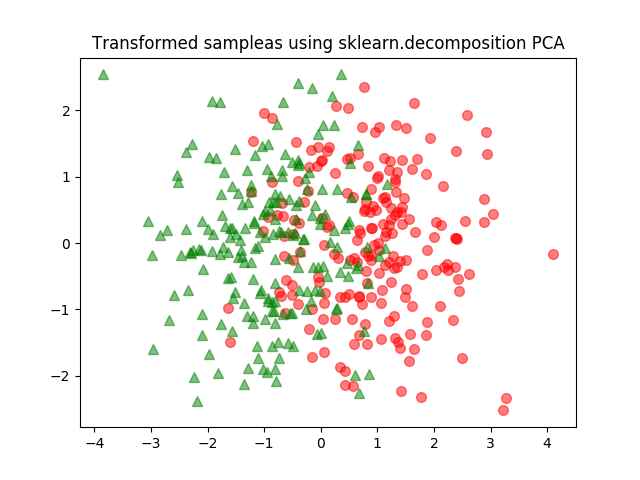

Text(0.5,1,'Transformed sampleas using sklearn.decomposition PCA')

In [103]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)
plt.figure()
plt.plot(sklearn_transf[0:200,0],sklearn_transf[0:200,1], 'o', markersize=7, color = 'red', alpha = 0.5, label = 'class1')
plt.plot(sklearn_transf[200:400,0],sklearn_transf[200:400,1], '^', markersize=7, color = 'green', alpha = 0.5, label = 'class2')
plt.title('Transformed sampleas using sklearn.decomposition PCA')